In [1]:
"""This Python script provides examples on using the E*TRADE API endpoints"""
from __future__ import print_function
import webbrowser
import json
import logging
import configparser
import sys
import requests
from rauth import OAuth1Service
from logging.handlers import RotatingFileHandler

# loading configuration file
config = {
    "CONSUMER_KEY": "a3a4819b33a6fb472332e4e465ab08bd",
    "CONSUMER_SECRET": "a5d35016c956ded2a2a0d0bdba91070e94d3b11b268c396e341f4e0e05e0f530",
    "SANDBOX_BASE_URL": "https://apisb.etrade.com",
    "PROD_BASE_URL": "https://api.etrade.com"
}
# logger settings
logger = logging.getLogger('my_logger')
logger.setLevel(logging.DEBUG)
handler = RotatingFileHandler("python_client.log", maxBytes=5*1024*1024, backupCount=3)
FORMAT = "%(asctime)-15s %(message)s"
fmt = logging.Formatter(FORMAT, datefmt='%m/%d/%Y %I:%M:%S %p')
handler.setFormatter(fmt)
logger.addHandler(handler)


def oauth():
    """Allows user authorization for the sample application with OAuth 1"""
    etrade = OAuth1Service(
        name="etrade",
        consumer_key=config["CONSUMER_KEY"],
        consumer_secret=config["CONSUMER_SECRET"],
        request_token_url="https://api.etrade.com/oauth/request_token",
        access_token_url="https://api.etrade.com/oauth/access_token",
        authorize_url="https://us.etrade.com/e/t/etws/authorize?key={}&token={}",
        base_url="https://api.etrade.com")

    menu_items = {"1": "Sandbox Consumer Key",
                  "2": "Live Consumer Key",
                  "3": "Exit"}
    while True:
        print("")
        options = menu_items.keys()
        selection = "2"
        if selection == "1":
            base_url = config["SANDBOX_BASE_URL"]
            break
        elif selection == "2":
            base_url = config["PROD_BASE_URL"]
            break
        elif selection == "3":
            break
        else:
            print("Unknown Option Selected!")
    print("")

    # Step 1: Get OAuth 1 request token and secret
    request_token, request_token_secret = etrade.get_request_token(
        params={"oauth_callback": "oob", "format": "json"})

    # Step 2: Go through the authentication flow. Login to E*TRADE.
    # After you login, the page will provide a verification code to enter.
    authorize_url = etrade.authorize_url.format(etrade.consumer_key, request_token)
    webbrowser.open(authorize_url)
    text_code = input("Please accept agreement and enter verification code from browser: ")

    # Step 3: Exchange the authorized request token for an authenticated OAuth 1 session
    session = etrade.get_auth_session(request_token,
                                  request_token_secret,
                                  params={"oauth_verifier": text_code})

    #main_menu(session, base_url)
    return session, base_url


In [321]:
import pyetrade
import random 
accountdic= {2090: 'd5KmohHTIvTh1_Zg9BruXw', 4958: 'Z7nLU3q7CZ-3HyRFIJAofw', 5838: 'aI4MnCMXSfNwEJiAptfcSg'}
# Obtained secrets from Etrade for Sandbox or Live
consumer_key = 'a3a4819b33a6fb472332e4e465ab08bd'
consumer_secret = 'a5d35016c956ded2a2a0d0bdba91070e94d3b11b268c396e341f4e0e05e0f530'
accountdic= {2090: 'd5KmohHTIvTh1_Zg9BruXw', 4958: 'Z7nLU3q7CZ-3HyRFIJAofw', 5838: 'aI4MnCMXSfNwEJiAptfcSg'}
# Using the EtradeOAuth object to retrive the URL to request tokens
auth = oauth()
# Use the printed URL to retrive Verification code
tokens = {'oauth_token': auth[0].access_token, 'oauth_token_secret': auth[0].access_token_secret}

In [1365]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def daily_vol_gain():
    dg = pd.read_excel('DaysGain.xlsx').dropna()
    del dg['Unnamed: 0']
    dg = dg.set_index('Date')
    dg = dg[dg.index.time < pd.to_datetime('16:00:00').time()]
    
    # Calculate daily high and low
    dghigh = dg.groupby(dg.index.date)['Gain'].max()
    dglow = dg.groupby(dg.index.date)['Gain'].min()
    vol = dghigh - dglow
    
    # Calculate cumulative gain
    dglast = dg.groupby(dg.index.date)['Gain'].last()
    cumulative_gain = dglast
    
    # Print statistics
    print("avg vol: $" + str(round(vol.mean(), 2)))
    print("today's vol: $" + str(round(vol[-1], 2)))
    # Plotting
    fig, ax1 = plt.subplots()
    
    # Plot daily volatility
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Volatility', color='tab:blue')
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Set major ticks to every day
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks with year-month-day
    ax1.plot(vol, marker='o', color='tab:blue', label='Daily Volatility')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    
    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Daily Gain', color='tab:red')
    ax2.plot(cumulative_gain, marker='o', color='tab:red', label='Daily Gain')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')
    
    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()
    
    # Set title
    plt.title('PA Volatility and Daily Gain')
    
    # Show plot
    plt.show()
    return 0


avg vol: $747.21
today's vol: $953.52


0

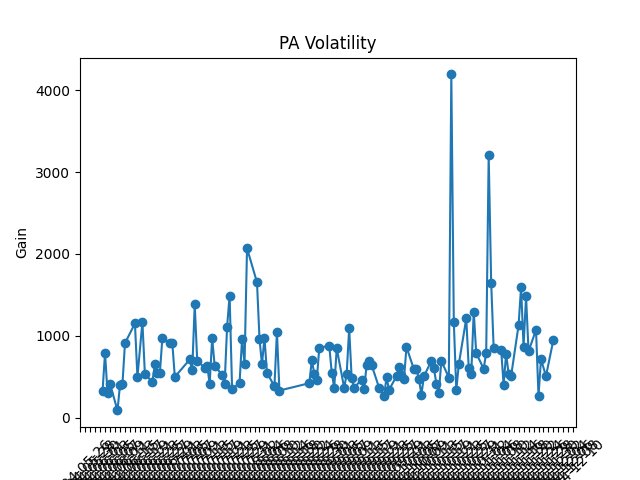

In [1364]:
def daily_vol():
    dg = pd.read_excel('DaysGain.xlsx').dropna()
    del dg['Unnamed: 0']
    dg = dg.set_index('Date')
    dg = dg[dg.index.time < pd.to_datetime('16:00:00').time()]
    dghigh = dg.groupby(dg.index.date)['Gain'].max()
    dglow = dg.groupby(dg.index.date)['Gain'].min()
    vol = dghigh - dglow
    vol = vol[vol != 0]
    print("avg vol: $" + str(round(vol.mean(),2)))
    print("today's vol: $" + str(round(vol[-1],2)))
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Set major ticks to every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the ticks with year-month-day
    ax.plot(vol, marker='o')
    plt.xticks(rotation=45)
    plt.title('PA Volatility')
    plt.ylabel('Gain')
    plt.xlabel('Date')
    return 0
daily_vol()


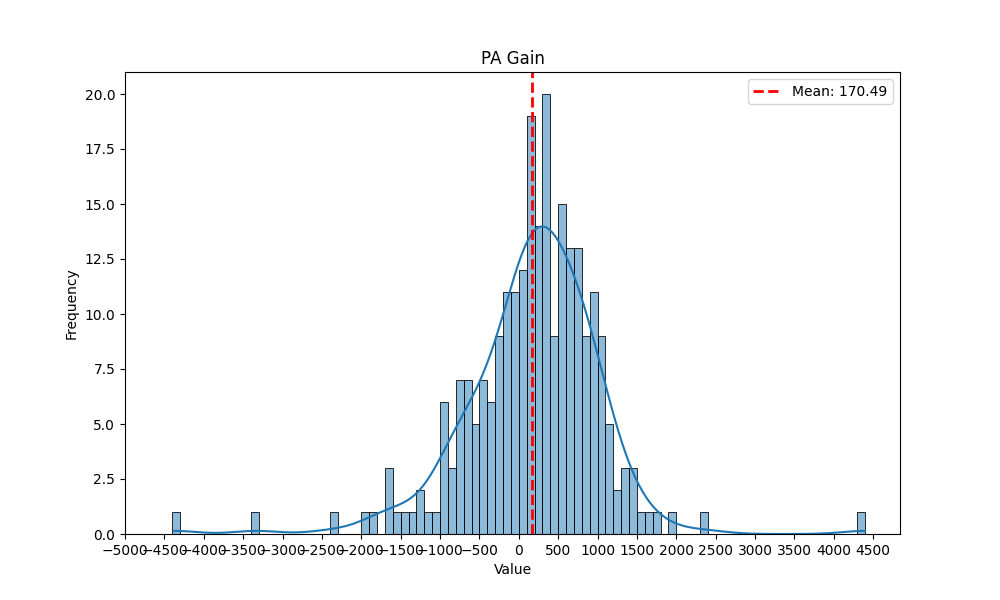

In [1366]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribution():
    data = dglast  # Replace dglast with your actual data variable
    mean_val = np.mean(data)

    # Define bins at every 100 interval
    min_val = int(min(data) // 100) * 100
    max_val = int(max(data) // 100 + 1) * 100
    bins = np.arange(min_val, max_val + 100, 100)

    # Plotting the histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=True, edgecolor='black')  # Histogram

    # Add a red vertical line at the mean
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')

    # Labels and title
    plt.title("PA Gain")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()  # Add legend to show mean
    plt.xticks(np.arange(-5000,5000, 500))

    # Display the plot
    plt.show()

# Call the function to plot
plot_distribution()


50188.1594


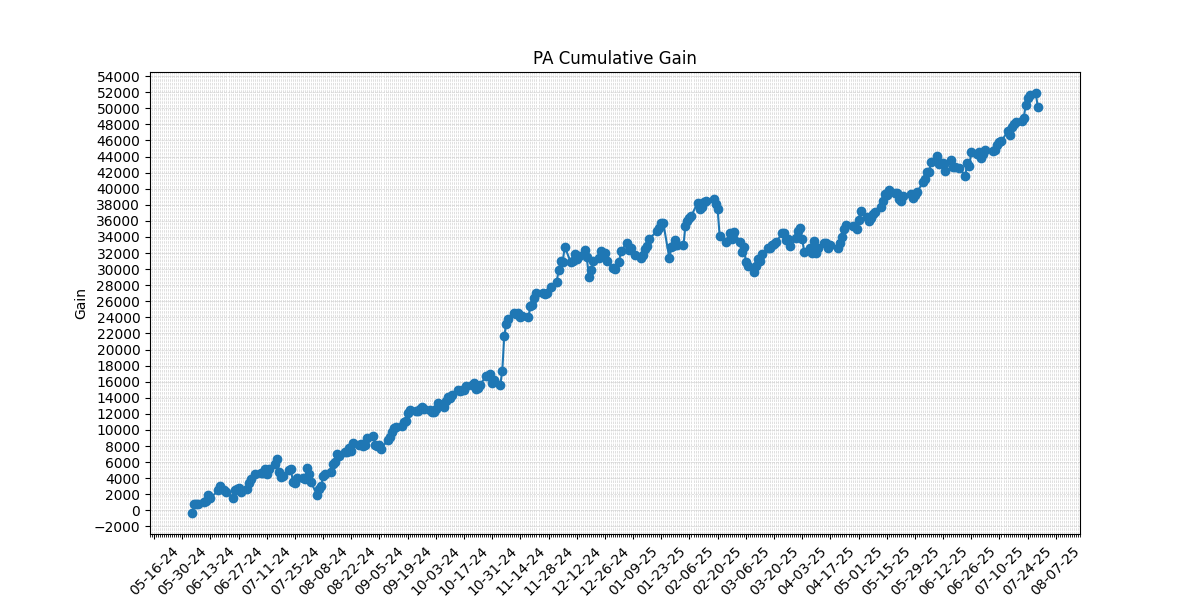

In [315]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import mplcursors
%matplotlib widget

dg = pd.read_excel('DaysGain2.xlsx')
dg['Date'] = dg['Date'].fillna(dg['day'])
dg = dg.set_index('Date')
dg = dg[dg.index.time < pd.to_datetime('16:00:00').time()]
dglast = dg.groupby(dg.index.date)['Gain'].last()
print(dglast.cumsum()[-1])
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size here
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))  # Set major ticks to every 7 days
ax.xaxis.set_minor_locator(mdates.DayLocator())  # Set minor ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))  # Format the ticks with year-month-day
line, = ax.plot(dglast.cumsum(), marker='o', linestyle='-', label='Gain')
ax.yaxis.set_major_locator(MultipleLocator(2000))
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')  # Force plain format for y-axis
plt.xticks(rotation=45)
plt.title('PA Cumulative Gain')
plt.ylabel('Gain')
plt.xlabel('Date')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
def format_coord(x, y):
    # Format the x and y values to plain text without scientific notation
    return f'x={mdates.num2date(x).strftime("%m-%d-%y")} y={y:,.2f}'

ax.format_coord = format_coord
cursor = mplcursors.cursor(line, hover=False)

@cursor.connect("add")
def on_add(sel):
    index = int(sel.index)
    gain = sel.target[1]

    if index > 0:
        prev_gain = sel.artist.get_ydata()[index - 1]
        delta = gain - prev_gain
    else:
        delta = 0.0

    sel.annotation.set_text(
        f'Date: {mdates.num2date(sel.target[0]).strftime("%m-%d-%y")}\n'
        f'Gain: {gain:,.2f}\n'
        f'Delta: {delta:+,.2f}'
    )
    sel.annotation.set_visible(True)

plt.show()

In [316]:
dglast.groupby(pd.to_datetime(dglast.index).to_period('m')).sum()

2024-06     2329.4526
2024-07     2970.7951
2024-08     3725.5041
2024-09     3455.8645
2024-10     3383.7943
2024-11    11854.5459
2024-12     2291.3179
2025-01     3048.4568
2025-02     1595.3511
2025-03     -800.6287
2025-04     1165.7685
2025-05     4548.1431
2025-06     5029.9150
2025-07     5589.8792
Freq: M, Name: Gain, dtype: float64

In [1275]:
def performance(benchmark):
    x = all_positions()
    x = x[x['Ticker'] != 'CLOX']
    x = x[x['Ticker'] != 'CLOZ']
    perf = float(round(100* (x['Days Gain'].sum() + append)/(x['Market Value'].sum() - x['Days Gain'].sum()),2))
    q = x[x['Ticker'] == benchmark]
    shareret = q['Days Gain'] / q['Quantity']
    qret = round(float(shareret / (q['Last Trade'] - shareret))*100,2)
    if perf > qret:
        print(str(perf) + "%, overperformance of " + str(round(perf-qret,2)) + "%")
    else:
        print(str(perf) + "%, underperformance of " + str(round(qret-perf,2)) + "%")
performance("QQQ")

790.6148000000001
0.47%, overperformance of 0.11%


In [337]:
short(4958, 'crh',-30, "market", None)

In [355]:
buy(2090, 'sage',200, "market", None)

In [ ]:
buy(4958, 'cper',-100, "market", None)

In [351]:
flip(4958, 'lqda', -80, 'market', None)

In [1898]:
beta()

('JBS US EQUITY', 'px_last')
total portfolio beta is 0.334
need to be long $16857.46 sqqq to be beta adjusted. 769 shares.


In [1787]:
append

174

In [ ]:
append = 55*3 + 6*33 + 46
all_positions('Days Gain')

34.850199999999994


,Ticker,Quantity,Days Gain,Total Gain,Market Value,Last Trade,Delta
0,SPOT,8.0,224.5999,2549.3299,5184.6800,648.0850,34.440
1,HIMS,30.0,149.8139,330.2140,1957.9139,65.2638,-9.786
2,NVDA,45.0,143.5500,2996.4200,8041.5000,178.7000,-24.975
3,TQQQ,-140.0,89.5999,-569.3400,-12423.6000,88.7400,153.131
4,RDDT,22.0,87.5600,1091.6500,3274.2600,148.8300,-12.641
5,PLTR,32.0,62.7199,2060.2399,5062.3999,158.2000,-14.080
6,SQQQ,450.0,58.5450,-2649.9546,8235.0450,18.3001,83.160
7,LQDA 25 Call,-5.0,50.0000,-1127.5899,-1500.0000,2.9000,0.000
8,NBIS,150.0,39.7950,2772.3051,7599.7950,50.6653,9.282
9,Brook,1500.0,30.5000,53.0801,13929.5000,11.4300,-36.400


In [3]:
import statsmodels.api as sm
from xbbg import blp
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import os
from datetime import date

def get_bdh_cached(tickers, flds, start_date):
    # Generate unique cache filename based on tickers + date
    cache_file = 'bdh_cache.pkl'  # or make dynamic based on tickers if needed

    # Step 1: Check if today's cache exists
    if os.path.exists(cache_file):
        modified = date.fromtimestamp(os.path.getmtime(cache_file))
        if modified == date.today():
            with open(cache_file, 'rb') as f:
                return pickle.load(f)

    # Step 2: Fetch fresh data from Bloomberg
    print("📡 Fetching fresh data from Bloomberg...")
    data = blp.bdh(tickers=tickers, flds=flds, start_date=start_date)

    # Step 3: Save to cache
    with open(cache_file, 'wb') as f:
        pickle.dump(data, f)
        print("💾 Cached fresh data.")

    return data

def beta():
    six_months_ago = datetime.today() - relativedelta(months=6)
    stocks = all_positions(zprint=False)
    stocks = stocks[stocks['Ticker'] != 'Brook']
    try:
        slast = float(stocks[stocks['Ticker'] == 'SQQQ']['Last Trade'])
    except:
        slast = 0
    stocks = stocks[~stocks['Ticker'].str.contains('Call|Put', case=False, na=False)]
    stocks['Ticker'] = stocks['Ticker'].str.replace('BRK.B', 'BRK/B', regex=False)
    tickers = stocks['Ticker'] + ' US EQUITY'
    stocks['Ticker'] += ' US EQUITY'
    data = get_bdh_cached(tickers=tickers, flds=['px_last'], start_date=six_months_ago)
    data = data.pct_change().dropna(how='all', axis=1)
    benchmark = data['QQQ US EQUITY']
    benchmark = benchmark.dropna()
    betas = {}
    for col in data.columns:
        try:
            y = data[col].dropna()
            x = benchmark.loc[y.index]  # align with y
            x = sm.add_constant(x)  # add intercept
            model = sm.OLS(y, x).fit()
            betas[col] = model.params[1]  # this is the beta
        except:
            continue
    beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])
    beta_df.index = beta_df.index.map(lambda x: x[0])
    stocks['Total Value'] = stocks['Market Value'].sum()
    stocks['Weight'] = stocks['Market Value'] / stocks['Total Value']
    beta_df = beta_df.reset_index().rename(columns={'index': 'Ticker'})
    stocks = stocks.merge(beta_df, on='Ticker', how='left')
    stocks['adjBeta'] = stocks['Weight'] * stocks['Beta']
    print('total portfolio beta is ' + str(round(stocks['adjBeta'].sum(),3)))
    if slast > 0:
        val = round(stocks['Total Value'][0] * stocks['adjBeta'].sum()/3,2)
        shares = round(val/slast)
        if np.abs(shares) < 1:
            print('beta adjusted')
            return
        print('need to be long $' + str(val) + ' sqqq to be beta adjusted. ' + str(shares) + " shares.")
    else:
        print('need to be long $' + str(round(stocks['Total Value'][0] * stocks['adjBeta'].sum()/3,2)) + ' sqqq to be beta adjusted')
beta()

NameError: name 'all_positions' is not defined

In [6]:
def all_positions(sortby = None, zprint = True, ignore = []):
    dgdf = pd.read_excel('DaysGain2.xlsx', index_col=0)
    accounts = pyetrade.ETradeAccounts(
    consumer_key,
    consumer_secret,
    tokens['oauth_token'],
    tokens['oauth_token_secret'],
    dev=False)
    acckeys = []
    out = pd.DataFrame()
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        acckeys.append(account['accountIdKey'])
    for key in acckeys:
        port = accounts.get_account_portfolio(key, resp_format= 'json')['PortfolioResponse']['AccountPortfolio'][0]['Position']
        dicts = []
        for position in port:
            dicts.append({'Ticker': position['symbolDescription'], 'Quantity': position['quantity'], 'Days Gain' : position['daysGain'], 'Total Gain': position['totalGain'], 'Market Value': position['marketValue'], 'Last Trade': position['Quick']['lastTrade']})
        df = pd.DataFrame(dicts)
        out = pd.concat([out, df], axis =0)
    brook_tickers = ['ASPI', 'HOND', 'NETD', 'AACT', 'WENNU', 'GSRT', 'LAES']
    out['Ticker'] = out['Ticker'].apply(lambda x: 'Brook' if x in brook_tickers else x)
    out = out.groupby('Ticker').agg({
    'Quantity': 'sum',
    'Days Gain': 'sum',
    'Total Gain' : 'sum',
    'Market Value': 'sum',
    'Last Trade': 'first'  # Keep the first occurrence of 'Last Trade' or choose a method
}).reset_index()
    dg = out['Days Gain'].sum() + append
    if zprint:
        print(dg)
    newrow = {'Date': pd.Timestamp(dt.datetime.now()), 'Gain': dg}
    dgdf = pd.concat([dgdf, pd.DataFrame([newrow])], ignore_index=True)
    dgdf.to_excel('DaysGain2.xlsx')
    out['Ticker'] = out['Ticker'].apply(lambda x: re.sub(r"^(\w+)\s+\w+\s+\d+\s+'\d+\s+\$(\d+\.?\d*)\s+(Call|Put)", r"\1 \2 \3", x))
    last = pd.read_excel('LastPositions.xlsx')
    del last['Unnamed: 0']
    last = last[['Ticker', 'Days Gain']]
    last['Days Gain d'] = last['Days Gain']
    last =  last[['Ticker', 'Days Gain d']]
    last = last[~last['Ticker'].isin(ignore)]
    out = pd.merge(last, out, on='Ticker', how='outer').fillna(0)
    out['Delta'] = out['Days Gain'] - out['Days Gain d']
    del out['Days Gain d']
    out['Delta'] = round(out['Delta'], 3)
    out = out[out['Quantity'] != 0]
    out['Quantity'] = round(out['Quantity'],0)
    out = out[out['Ticker'] != '162CVR021']
    out.to_excel('LastPositions.xlsx')
    if sortby:    
        return out.sort_values(by = sortby, ascending = False).reset_index(drop = True)
    else:
        return out.reset_index(drop = True)

In [342]:
import tiingo
from tiingo import TiingoClient
config = {}
config['session'] = True
config['api_key'] = "7eef93d596bb5db06a125388ed2ae999a4332fd7"
client = TiingoClient(config)
from pandas.tseries.offsets import BDay
def profit_since(positions = ['all'], start = '2024-01-01'):
    start = pd.to_datetime(start)
    td = pd.to_datetime('today')
    x = all_positions(zprint=False)
    zdf = pd.DataFrame()
    if positions == ['all']:
        positions = x['Ticker'].tolist() 
    for ticker in positions:
        try:
            df = client.get_dataframe(ticker, frequency='Daily', startDate= start, endDate= td - BDay(1))
            startp = float(df['adjClose'][0])
            q = x[x['Ticker'] == ticker]['Quantity']
            last = x[x['Ticker'] == ticker]['Last Trade']
            profit = float((last - startp)*q)
            newrow = {'Ticker': ticker, 'Quantity': int(q), 'Profit': profit, 'Since': start}
            zdf = pd.concat([zdf, pd.DataFrame([newrow])], ignore_index=True)
        except Exception as e:
            continue
    return zdf
profit_since(['NVDA'], start= '05-29-2005')

,Ticker,Quantity,Profit,Since
0,NVDA,40,5921.314206,2005-05-29


In [282]:
daily_winners()

,Ticker,Quantity,Days Gain,Total Gain,Market Value,Last Trade,AccountIdKey,Account,Shares won
0,SQQQ,220,121.9,2737.72,7538.3,34.265,d5KmohHTIvTh1_Zg9BruXw,2090,3.0


In [1006]:
liquidate_daily_winners(fr = True, close = False, ignore = ['PLTR', 'SOFI'])


selling 2 shares of RDDT
selling 2 shares of WBA
selling 1 shares of FBTC


In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import datetime as dt 

def get_positions(accno):
    accounts = pyetrade.ETradeAccounts(
        consumer_key,
        consumer_secret,
        tokens['oauth_token'],
        tokens['oauth_token_secret'],
        dev=False)
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        if account['accountId'][-4:] == str(accno):
            acc = account
    port = accounts.get_account_portfolio(acc['accountIdKey'], resp_format= 'json')['PortfolioResponse']['AccountPortfolio'][0]['Position']
    dicts = []
    for position in port:
        dicts.append({'Ticker': position['symbolDescription'], 'Quantity': position['quantity'], 'Days Gain' : position['daysGain'], 'Total Gain': position['totalGain'], 'Market Value': position['marketValue'], 'Last Trade': position['Quick']['lastTrade'], 'AccountIdKey': acc['accountIdKey']})
    df = pd.DataFrame(dicts)
    
    def extract_underlying(ticker):
        match = re.match(r'([A-Z]+)', ticker)
        return match.group(1) if match else ticker
    
    df['underlying'] = df['Ticker'].apply(extract_underlying)
    grouped = df.groupby('underlying')

    # Find underlying symbols with more than one occurrence
    symbols_to_remove = grouped.filter(lambda x: len(x) > 1)['underlying'].unique()

    # Filter out rows with these underlying symbols
    filtered_df = df[~df['underlying'].isin(symbols_to_remove)]

    # Drop the 'underlying' column as it is no longer needed
    filtered_df = filtered_df.drop(columns=['underlying'])
    return filtered_df
def daily_winners():
    accounts = [4958, 2090, 9320, '0164', 5838]
    df = pd.DataFrame()
    for acct in accounts:
        pos = get_positions(acct)
        pdf = pos[pos['Days Gain'] > pos['Last Trade']]
        pdf['Account'] = acct
        pdf['Shares won'] = (pdf['Days Gain'] / pdf['Last Trade']).apply(np.floor)
        df = pd.concat([df,pdf])
    return df.reset_index(drop = True)
def total_winners():
    accounts = [4958, 2090, 9320, '0164', 5838]
    df = pd.DataFrame()
    for acct in accounts:
        pos = get_positions(acct)
        pdf = pos[pos['Total Gain'] > pos['Last Trade']]
        pdf['Account'] = acct
        pdf['Shares won'] = (pdf['Total Gain'] / pdf['Last Trade']).apply(np.floor)
        df = pd.concat([df,pdf])
    return df.reset_index(drop = True)
def liquidate_daily_winners(fr = False, close = False, ignore = []):
    if not close:
        pt = 'MARKET'
    else:
        pt = 'MARKET_ON_CLOSE'
    winners = daily_winners()
    for index, row in winners.iterrows():
        if row['Ticker'] in ignore:
            continue
        orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
        if not fr:
            a = orders.preview_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(row['Shares won']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
            import time
            time.sleep(2)
            print(a)
        else:
            import time
            time.sleep(2)
            print("selling " + str(int(row['Shares won'])) + " shares of " + str(row['Ticker']))
            orders.place_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(row['Shares won']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
def liquidate_everything(account, fr = False, close = False, forget = [], multiplier = 1):
    if not close:
        pt = 'MARKET'
    else:
        pt = 'MARKET_ON_CLOSE'
    pos = get_positions(account)
    pos.to_excel('Positions' + str(account) + '.xlsx')
    for index, row in pos.iterrows():
        if row['Ticker'] in (forget):
            continue
        orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
        if not fr:
            a = orders.preview_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(multiplier * row['Quantity']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
            print(a)
        else:
            orders.place_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(multiplier * row['Quantity']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
def buy_everything_back(account, fr = False, close = False, forget = []):
    pos = pd.read_excel('Positions' + str(account) + '.xlsx')
    if not close:
        pt = 'MARKET'
    else:
        pt = 'MARKET_ON_CLOSE'
    for index, row in pos.iterrows():
        if row['Ticker'] in (forget):
            continue
        orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
        if not fr:
            a = orders.preview_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'BUY', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(row['Quantity']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
            print(a)
        else:
            orders.place_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'BUY', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=int(row['Quantity']), marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')


def buy(accno, ticker, quantity, market = "market", limit = None):
    if quantity < 0:
        sell(accno, ticker, -1*quantity, market, limit)
        return
    accounts = pyetrade.ETradeAccounts(
    consumer_key,
    consumer_secret,
    tokens['oauth_token'],
    tokens['oauth_token_secret'],
    dev=False)
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        if account['accountId'][-4:] == str(accno):
            acc = account
    orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
    if market.lower() == 'market':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'BUY', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
    elif market.lower() == 'close':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'BUY', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET_ON_CLOSE', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')

def sell(accno, ticker, quantity, market = "market", limit = None):
    accounts = pyetrade.ETradeAccounts(
    consumer_key,
    consumer_secret,
    tokens['oauth_token'],
    tokens['oauth_token_secret'],
    dev=False)
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        if account['accountId'][-4:] == str(accno):
            acc = account
    orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
    if market.lower() == 'market':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
    elif market.lower() == 'close':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET_ON_CLOSE', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')

def short(accno, ticker, quantity, market = "market", limit = None):
    if quantity < 0:
        cover(accno, ticker, -1*quantity, market, limit)
        return
    accounts = pyetrade.ETradeAccounts(
    consumer_key,
    consumer_secret,
    tokens['oauth_token'],
    tokens['oauth_token_secret'],
    dev=False)
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        if account['accountId'][-4:] == str(accno):
            acc = account
    orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
    if market.lower() == 'market':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'SELL_SHORT', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
    elif market.lower() == 'close':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'SELL_SHORT', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET_ON_CLOSE', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
def cover(accno, ticker, quantity, market = "market", limit = None):
    accounts = pyetrade.ETradeAccounts(
    consumer_key,
    consumer_secret,
    tokens['oauth_token'],
    tokens['oauth_token_secret'],
    dev=False)
    for account in accounts.list_accounts()['AccountListResponse']['Accounts']['Account']:
        if account['accountId'][-4:] == str(accno):
            acc = account
    orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
    if market.lower() == 'market':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'BUY_TO_COVER', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
    elif market.lower() == 'close':
        orders.place_equity_order(resp_format = 'xml', accountIdKey = accountdic[accno], symbol = ticker, orderAction = 'BUY_TO_COVER', clientOrderId = random.randint(1000000000, 9999999999), priceType = 'MARKET_ON_CLOSE', quantity= quantity, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')

def flip(accno, ticker, quantity, market = "market", limit = None):
    if quantity > 0:
        buy(accno, ticker, quantity, market, limit)
        sell(accno, ticker, quantity, 'close', limit)
        return
    if quantity < 0:
        short(accno, ticker, -1*quantity, market, limit)
        import time
        time.sleep(5)
        cover(accno, ticker, -1*quantity, 'close', limit)
        return
    

In [5]:
def liquidate_one_share(account, fr = False, close = False, forget = []):
    if not close:
        pt = 'MARKET'
    else:
        pt = 'MARKET_ON_CLOSE'
    pos = get_positions(account)
    pos.to_excel('Positions' + str(account) + '.xlsx')
    for index, row in pos.iterrows():
        if row['Ticker'] in (forget):
            continue
        orders = pyetrade.ETradeOrder(consumer_key,consumer_secret,tokens['oauth_token'],tokens['oauth_token_secret'],dev=False)
        if not fr:
            a = orders.preview_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=1, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')
            print(a)
        else:
            orders.place_equity_order(resp_format = 'xml', accountIdKey = row['AccountIdKey'], symbol = row['Ticker'], orderAction = 'SELL', clientOrderId = random.randint(1000000000, 9999999999), priceType = pt, quantity=1, marketSession='REGULAR', orderTerm='GOOD_FOR_DAY')


In [321]:
portfolio = pd.read_excel("s&p june 2024 portfolio (1).xlsx")
portfolio

,Ticker,Action,AMOUNT,last trade,shares3,spending
0,CNH,S&P 400 Add,21000.0,10.87,386,20955.96
1,WAL,S&P 400 Add,NaN,87.43,48,NaN
2,VNOM,S&P 400 Add,NaN,45.61,92,NaN
3,HLNE,S&P 400 Add,NaN,161.14,26,NaN
4,PSN,S&P 400 Add,NaN,99.47,42,NaN


In [320]:
def run_at_2_on_friday(portfolio):
    for index, row in portfolio.iterrows():
        buy(5838, row['Ticker'], row['shares3'], "market", None)
        sell(5838, row['Ticker'], row['shares3'], "close", None)
run_at_2_on_friday(portfolio)

{'code': '8400', 'message': 'This order cannot be accepted due to insufficient funds in your account.The order exceeds your available purchasing power by approximately $1.41. At the time of order preview, the maximum allowable quantity was estimated to be 41.'}


Exception: Etrade API Error - Code: 8400, Msg: This order cannot be accepted due to insufficient funds in your account.The order exceeds your available purchasing power by approximately $1.41. At the time of order preview, the maximum allowable quantity was estimated to be 41.